In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 训练样本
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

In [4]:
def compute_cost(x, y, w, b): #x, y是样本，类型为数组
    cost = 0
    f_wb = w*x + b
    cost_array = (y - f_wb)**2
    return 1/(2*x.shape[0]) * sum(cost_array)
# compute_cost(x_train, y_train, 250, 0)

def plt_gradient():
    n = 50 # 点数
    w_array = np.linspace(0, 400, n) # 参数w
    cost_array = np.zeros_like(w_array) # 成本
    for i in range(0, n):
        cost_array[i] = compute_cost(x_train, y_train, w_array[i], 100) # 固定b=100
    
    # 绘图
    fig, ax = plt.subplots()
    ax.set_title('cost vs w')
    ax.set_ylabel('Cost')
    ax.set_xlabel('W')
    ax.plot(w_array, cost_array)
    ax.grid(True)
    plt.show()

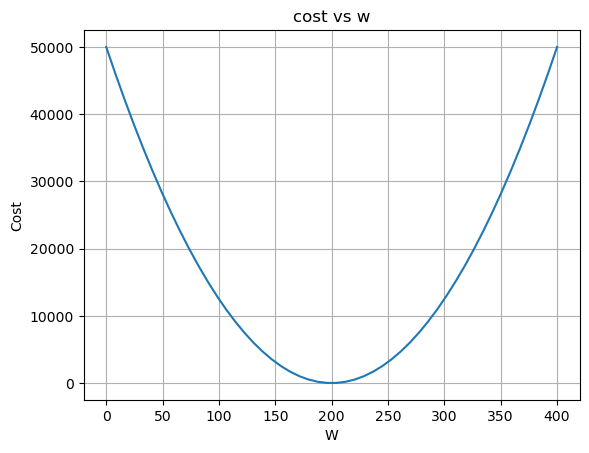

In [5]:
plt_gradient()
 

In [95]:
def compute_gradient(x, y, w, b): # x, y是数组，w, b是数
    n = x.shape[0]
    f_wb = w*x + b
    dj_dw = sum(1/n*(f_wb - y)*x)
    dj_db = sum(1/n*(f_wb - y))
    return dj_dw, dj_db
    
compute_gradient(x_train, y_train, 200, 100)

(0.0, 0.0)

dj_dw and dj_db are 0 when w=200 & b=100


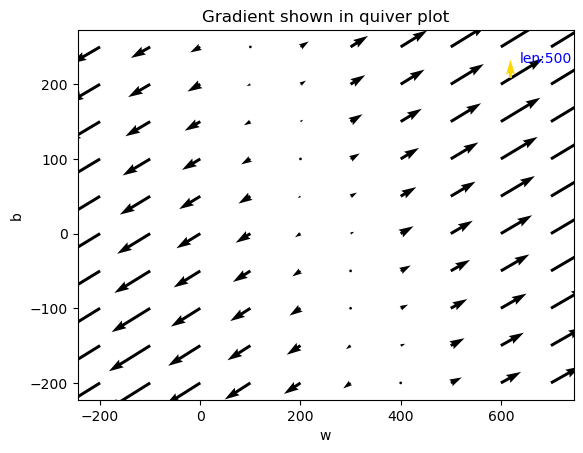

In [99]:
def plt_gradient2():
    w_array = np.linspace(-200, 700, 10)
    b_array = np.linspace(-200, 250, 10)
    # 坐标点
    tmp_w, tmp_b = np.meshgrid(w_array, b_array)
    #print(tmp_b)
    
    # 向量分量矩阵
    U = np.zeros_like(tmp_w)
    V = np.zeros_like(tmp_b) 
    
    # ax.quiver(X, Y, U, V) #参数 X, Y, U, V; X横坐标，Y纵坐标，[X, Y]是位置，U,V是矩阵或向量 [U, V]表示向量
    
    
    # 计算梯度
    for i in range(w_array.shape[0]):
        for j in range(b_array.shape[0]):
            # 注意！不能写成U[i,j], 因为第一个index是表示Y轴，第二个坐标是表示X轴
            U[j,i], V[j,i] = compute_gradient(x_train, y_train, w_array[i], b_array[j])
            
    #print(U)
    #print(V)
    print('dj_dw and dj_db are %d when w=%d & b=%d'% (U[6,4], w_array[4], b_array[6]))
   
    # 绘图
    fig, ax = plt.subplots()
    Q = ax.quiver(tmp_w, tmp_b, U, V)
    # 设置箭头说明
    ax.quiverkey(Q,X=0.8, Y=0.82, U=500,angle=90, color='gold', label='len:500', labelcolor='b', labelpos='E',coordinates='figure')
    ax.set_xlabel('w')
    ax.set_ylabel('b')
    ax.set_title('Gradient shown in quiver plot')
    
plt_gradient2()

In [109]:
def gradient_descent(x, y, w_init, b_init, alpha, num_iter, cost_func, gradient_func):
    
    w = w_init
    b = b_init
    J_history = []
    p_history = []
    
    
    for i in range(num_iter):
        #迭代
        
        # 记录每次迭代cost和(w,b)
        J_history.append(cost_func(x, y, w, b))
        p_history.append((w, b))
        
        dj_dw, dj_db = gradient_func(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
    return w,b,J_history,p_history

# w,b,J_history,p_history = gradient_descent(x_train ,y_train,0,0, 0.04, 10, compute_cost, compute_gradient)
# print(J_history)
# print(p_history)

[85000.0, 63297.0, 47136.33, 35102.63094048001, 26141.987674453827, 19469.6260982533, 14501.181905378744, 10801.521416908638, 8046.632169162617, 5995.245600816071]
[(0, 0), (26.0, 16.0), (48.44, 29.8), (67.80799999999999, 41.7016), (84.525104, 51.965056000000004), (98.95469023999999, 60.814947520000004), (111.41032436479999, 68.44506820480001), (122.16258783603199, 75.02264601472001), (131.4449702915456, 80.69198490396928), (139.45895416815287, 85.57760729031777)]


In [117]:
# 初始化参数
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_history, p_history = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
#w_final, b_final是最后一次迭代后的w,b；J_history是每次迭代记录的cost, p_history是每次迭代记录的(w,b)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

(w,b) found by gradient descent: (199.9929,100.0116)


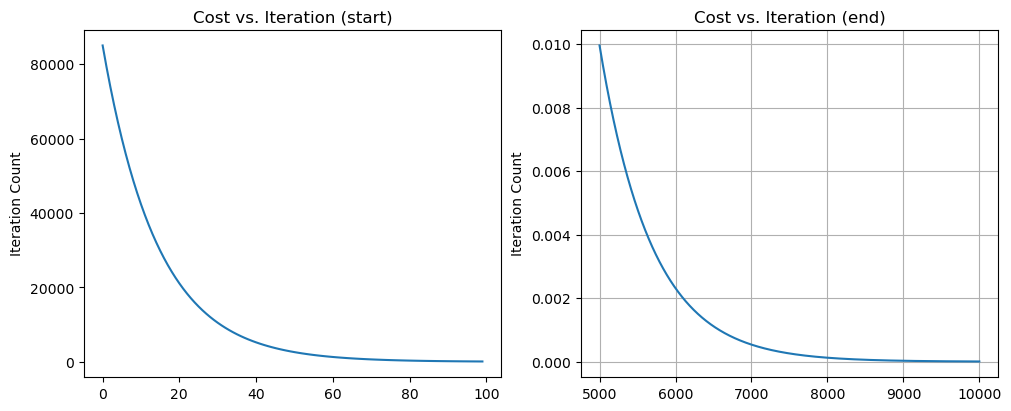

In [129]:
# 绘图
def plt_cost():
    fig , (ax1, ax2) = plt.subplots(1,2,layout="constrained",figsize=(10,4)) 
        # layout和figsize都是用来构建figure的参数
        # layout="constrained" 解决lable overlapping的问题，
        # figsize 表示Width, height in inches. 默认[6.4, 4.8]
    ax1.plot(J_history[:100])
    ax1.set_ylabel('Cost')
    ax1.set_ylabel('Iteration Count')
    ax1.set_title('Cost vs. Iteration (start)')
    ax2.plot(np.arange(5000,iterations),J_history[5000:])
    ax2.set_ylabel('Cost')
    ax2.set_ylabel('Iteration Count')
    ax2.set_title('Cost vs. Iteration (end)')
    ax2.grid(True)
plt_cost()

In [ ]:
# 预测
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")